# **Projet 6 :** Classifiez automatiquement des biens de consommation

## Notebook de prétraitement et exploration

### Notes

Voici les contraintes : 

Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 
- deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf
- une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText)
- une approche de type word/sentence embedding avec BERT
- une approche de type word/sentence embedding avec USE (Universal Sentence Encoder)

Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :
- un algorithme de type SIFT / ORB / SURF
- un algorithme de type CNN Transfer Learning

### Import

In [5]:
%pylab inline
import os
import json
import pandas as pd
import missingno as msno
import uuid

Populating the interactive namespace from numpy and matplotlib


### Configuration

In [6]:
%load_ext autoreload
%autoreload 2

# configurations pandas
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Chargement des données

In [7]:
path = './data/Flipkart'
data = pd.read_csv(os.path.join(path,'flipkart_com-ecommerce_sample_1050.csv'))
print(data.shape)

(1050, 15)


<AxesSubplot:>

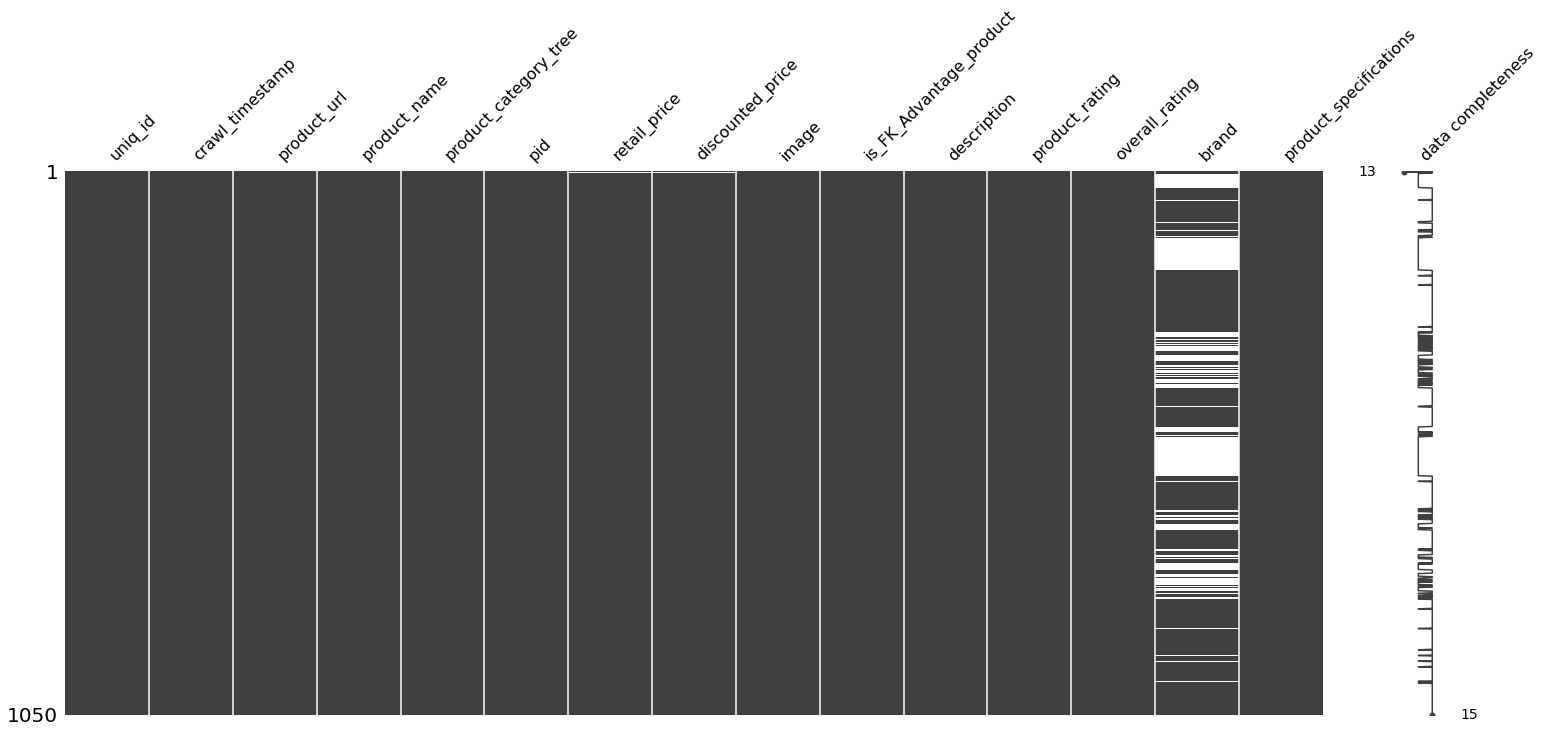

In [8]:
msno.matrix(data, labels=True)

In [9]:
def product_specification_decode(json_str):
    s = json_str.lower().replace("=>", ':').replace('{"product_specification":nil}', '{"product_specification":""}')
    return json.loads(s)

def product_category_tree_decode(json_str):
    cat_list = json.loads(json_str.lower())
    assert(isinstance(cat_list, list))
    assert(len(cat_list) == 1)
    return [s.strip() for s in cat_list[0].split('>>')]

data['uniq_id'] = data['uniq_id'].apply(lambda x: uuid.UUID(x))
data['crawl_timestamp'] = data['crawl_timestamp'].apply(lambda x: pd.to_datetime(x))
data['retail_price'] = data['retail_price'].astype('float64')
data['discounted_price'] = data['discounted_price'].astype('float64')
data['product_rating'] = data['product_rating'].replace(['No rating available'], -1.0)
data['overall_rating'] = data['overall_rating'].replace(['No rating available'], -1.0)
data['product_rating'] = data['product_rating'].astype('float64')
data['overall_rating'] = data['overall_rating'].astype('float64')
data['brand'].fillna('', inplace=True)
data['product_specifications'].fillna('{"product_specification":""}', inplace=True)
data['product_specifications'] = data['product_specifications'].apply(product_specification_decode)
data['product_category_tree'] = data['product_category_tree'].apply(product_category_tree_decode)
data[[f"product_category_{i}" for i in range(7)]] = pd.DataFrame(data['product_category_tree'].tolist(), index= data.index)
data['description'] = data['description'].apply(lambda x: x.lower())
data['product_name'] = data['product_name'].apply(lambda x: x.lower())
data['product_name_description'] = data['product_name'] + ' ' + data['description']
data.set_index('uniq_id', inplace=True, verify_integrity=True)

<AxesSubplot:>

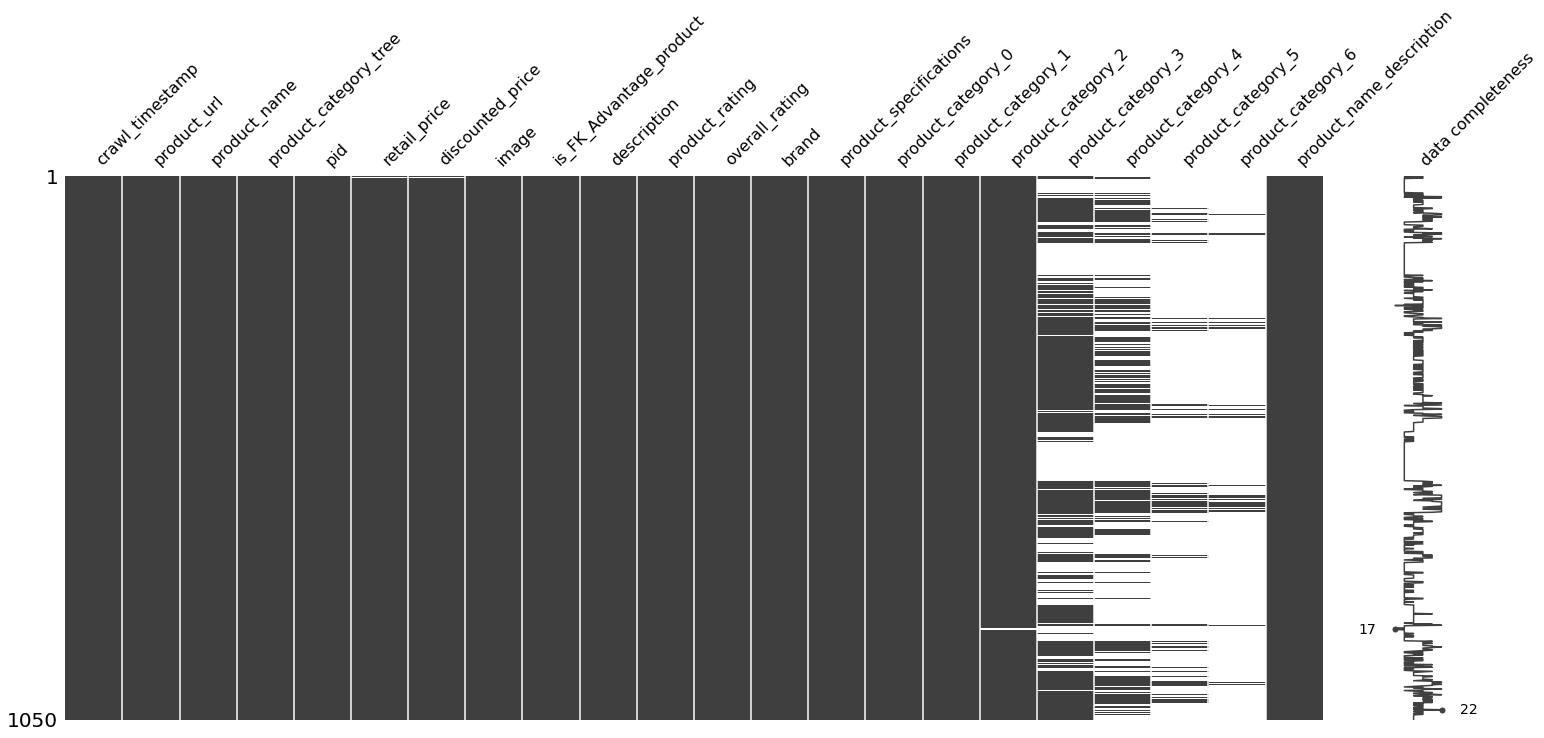

In [10]:
msno.matrix(data, labels=True)

In [11]:
data.drop([
    'crawl_timestamp',
    'product_url',
    'pid',
    'retail_price',
    'discounted_price',
    'is_FK_Advantage_product',
    'product_rating',
    'overall_rating',
    'brand',
    'product_category_2',
    'product_category_3',
    'product_category_4',
    'product_category_5',
    'product_category_6'
], axis=1, inplace=True, errors='ignore')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 55b85ea1-5a15-36d4-6b71-90ad6fff8ce7 to f2f027ad-6a6d-f617-c9f1-25173da71e44
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   product_name              1050 non-null   object
 1   product_category_tree     1050 non-null   object
 2   image                     1050 non-null   object
 3   description               1050 non-null   object
 4   product_specifications    1050 non-null   object
 5   product_category_0        1050 non-null   object
 6   product_category_1        1050 non-null   object
 7   product_name_description  1050 non-null   object
dtypes: object(8)
memory usage: 73.8+ KB


In [13]:
print(data['product_category_0'].unique().size)
data['product_category_0'].value_counts()

7


home furnishing               150
baby care                     150
watches                       150
home decor & festive needs    150
kitchen & dining              150
beauty and personal care      150
computers                     150
Name: product_category_0, dtype: int64

In [14]:
print(data['product_category_1'].unique().size)
data['product_category_1'].value_counts()

62


wrist watches                      149
laptop accessories                  87
infant wear                         84
coffee mugs                         74
showpieces                          71
bed linen                           65
fragrances                          65
network components                  49
cookware                            27
table decor & handicrafts           27
combos and kits                     24
wall decor & clocks                 22
bath linen                          21
curtains & accessories              19
makeup                              18
baby bedding                        15
body and skin care                  15
baby & kids gifts                   15
baby bath & skin                    14
kitchen tools                       14
kitchen & dining linen              14
decorative lighting & lamps         14
containers & bottles                13
cushions, pillows & covers          13
hair care                            9
feeding & nursing        

In [15]:
# Label encoding pour cat 0 et cat 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
product_category_0 = data['product_category_0'].unique()
le.fit(product_category_0)
data['product_category_0_label'] = le.transform(data['product_category_0'])
product_category_1 = data['product_category_1'].unique()
le.fit(product_category_1)
data['product_category_1_label'] = le.transform(data['product_category_1'])

<AxesSubplot:>

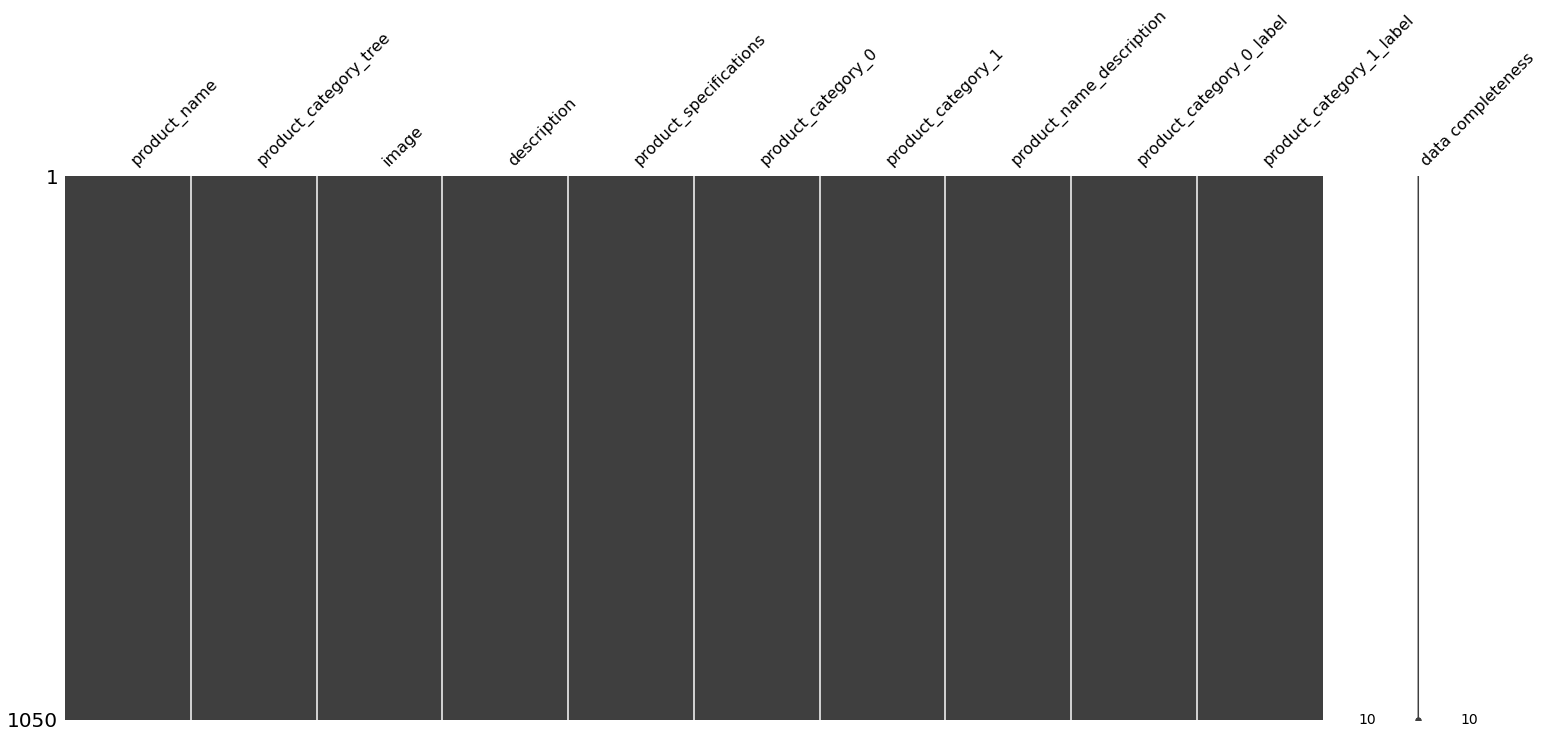

In [16]:
msno.matrix(data, labels=True)

### Export du notebook en HTML

In [18]:
!jupyter nbconvert --config nbconvert/config_html.py

[NbConvertApp] Converting notebook P6_01_notebookexploration.ipynb to html
[NbConvertApp] Writing 787215 bytes to P6_01_notebookexploration.html
[NbConvertApp] Converting notebook P6_02_notebookbagofword.ipynb to html
[NbConvertApp] Writing 3649852 bytes to P6_02_notebookbagofword.html
[NbConvertApp] Converting notebook P6_03_notebookembedding.ipynb to html
[NbConvertApp] Writing 8456772 bytes to P6_03_notebookembedding.html
[NbConvertApp] Converting notebook P6_04_notebookimages.ipynb to html
[NbConvertApp] Writing 47617971 bytes to P6_04_notebookimages.html
